In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import scienceplots

A parity graph of the model for the validation set, with each dot being a single forecast. The 45 degree line represents the perfect forecast. 

The over- and under-predictions are marked with different colors, which have differing average outputs marked with two vertical lines.

In [3]:
preds = pd.read_csv('../poc/tblogs/LitRsModel/woNightShuffleTrue/2024-11-22_10-07-40/preds/val2_predictions.csv', sep=';', encoding='utf-8')

In [4]:
ymax = max(preds['y_true'].max(), preds['y_pred'].max())

<Figure size 640x480 with 0 Axes>

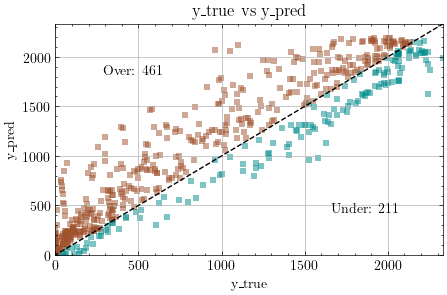

In [5]:
# plot y_true vs y_pred
over, under = 0, 0
plt.clf()
plt.figure(figsize=(5, 3))
with plt.style.context('science'):
    plt.plot([-10, ymax], [-10, ymax], label='Line', color='black', linestyle='--')
    for i in range(len(preds)):
        if preds['y_pred'][i] > preds['y_true'][i]:
            plt.scatter(x=preds['y_true'][i], y=preds['y_pred'][i], marker='s', s=15, color='sienna', alpha=0.5, linewidth=0.0)
            over += 1
        else:
            plt.scatter(x=preds['y_true'][i], y=preds['y_pred'][i], marker='s', s=15, color='darkcyan', alpha=0.5, linewidth=0.0)
            under += 1
    plt.text(0.2, 0.8, f'Over: {over}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.text(0.8, 0.2, f'Under: {under}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.xlabel('y_true')
    plt.ylabel('y_pred')
    plt.ylim(0, ymax)
    plt.xlim(0, ymax)
    plt.title('y_true vs y_pred')
    plt.grid()
    plt.show()